In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv("vehicles.csv")

# Basic info
print("Shape of dataset:", df.shape)
print("\nFirst 5 rows:\n", df.head())

# Missing values check
print("\nMissing values:\n", df.isnull().sum())

# Data types and description
print("\nData description:\n", df.describe())


Shape of dataset: (846, 19)

First 5 rows:
    compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1       

Available columns:
 Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio', 'class'],
      dtype='object')

Missing values per column:
 compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                

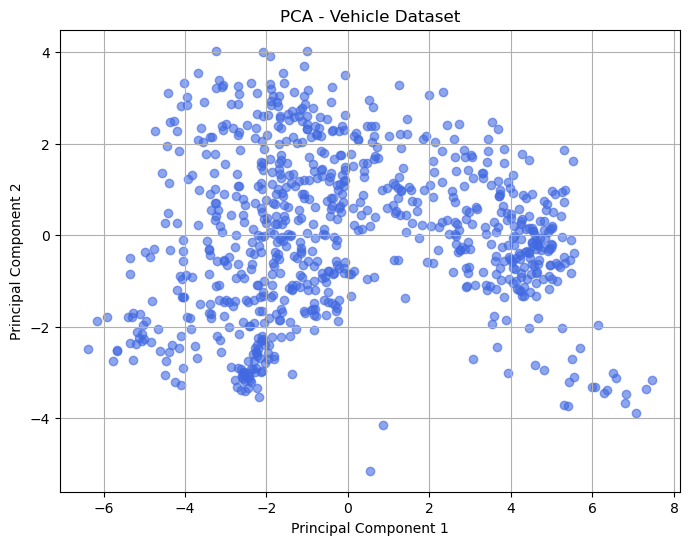

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load dataset
df = pd.read_csv("vehicles.csv")

# Show actual column names
print("Available columns:\n", df.columns)

# Drop non-feature column ('class') if it exists
if 'class' in df.columns:
    X = df.drop('class', axis=1)
else:
    X = df.iloc[:, :-1]  # safe fallback

# Check and handle missing values
print("\nMissing values per column:\n", X.isnull().sum())

# Option 1: Drop rows with NaN (if only a few rows)
X = X.dropna()

# Option 2 (alternative): Fill NaN with column mean
# X = X.fillna(X.mean())

# Normalize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Show explained variance
print("\nExplained Variance Ratio (PC1 & PC2):", pca.explained_variance_ratio_)

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.6, color='royalblue')
plt.title("PCA - Vehicle Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()


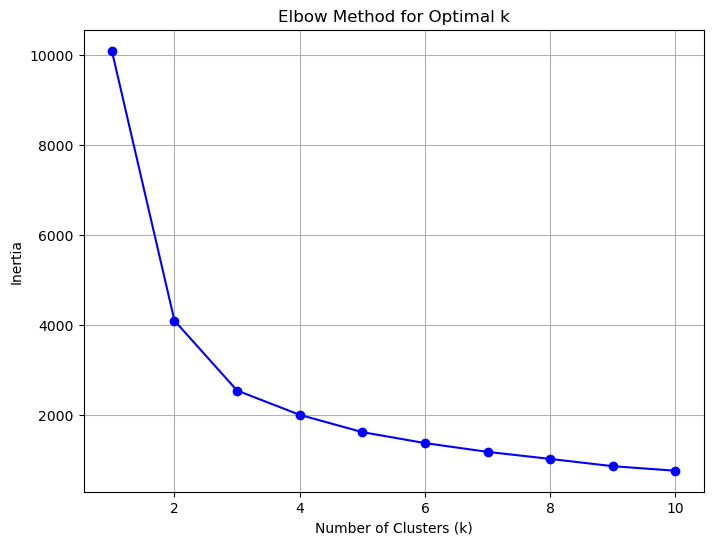

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Load dataset
df = pd.read_csv("vehicles.csv")

# Use correct column name or drop the last column (label)
if 'class' in df.columns:
    X = df.drop('class', axis=1)
else:
    X = df.iloc[:, :-1]  # fallback if column name varies

# Drop any missing values
X = X.dropna()

# Normalize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Elbow method
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)

# Plot Elbow curve
plt.figure(figsize=(8, 6))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()


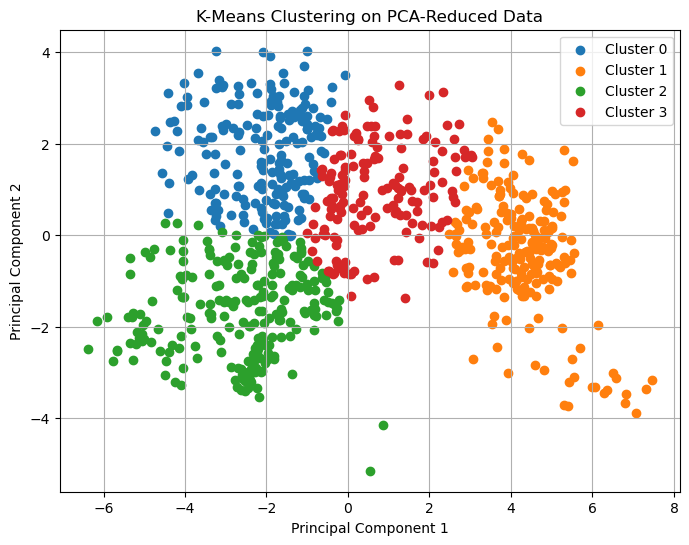


Cluster Sizes:
Cluster
2    245
1    218
0    190
3    160
Name: count, dtype: int64

Feature Influence on Principal Components (Loadings):

                                  PC1       PC2
compactness                  0.274447  0.127106
circularity                  0.294004 -0.134430
distance_circularity         0.304380  0.072145
radius_ratio                 0.268889  0.176416
pr.axis_aspect_ratio         0.083020  0.098763
max.length_aspect_ratio      0.098483 -0.030207
scatter_ratio                0.316689 -0.044390
elongatedness               -0.313205 -0.015254
pr.axis_rectangularity       0.313612 -0.057231
max.length_rectangularity    0.281286 -0.120324
scaled_variance              0.309162 -0.061910
scaled_variance.1            0.314164 -0.048021
scaled_radius_of_gyration    0.270337 -0.210170
scaled_radius_of_gyration.1 -0.025604 -0.493794
skewness_about               0.039680  0.056260
skewness_about.1             0.063160  0.121035
skewness_about.2             0.030941  0.5

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Load dataset
df = pd.read_csv("vehicles.csv")

# Drop the 'class' column if it exists
if 'class' in df.columns:
    X = df.drop('class', axis=1)
else:
    X = df.iloc[:, :-1]  # fallback if column name varies

# Drop missing values
X = X.dropna()

# Normalize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Apply K-Means clustering
k = 4  # Change this if your elbow curve suggested a different value
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X_pca)

# Add cluster labels to dataframe
df_clusters = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_clusters['Cluster'] = clusters

# Plot clusters
plt.figure(figsize=(8, 6))
for cluster in range(k):
    cluster_data = df_clusters[df_clusters['Cluster'] == cluster]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {cluster}')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering on PCA-Reduced Data')
plt.legend()
plt.grid(True)
plt.show()

# --- STEP 5: Cluster Evaluation ---

# A. Cluster Sizes
print("\nCluster Sizes:")
print(df_clusters['Cluster'].value_counts())

# B. PCA Feature Importance (Loadings)
pca = PCA(n_components=2)
pca.fit(X_scaled)
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=X.columns)
print("\nFeature Influence on Principal Components (Loadings):\n")
print(loadings)

# C. Optional: Compare clusters with original 'class' labels
if 'class' in df.columns:
    df_clusters['TrueLabel'] = df['class'].reset_index(drop=True)
    print("\nCluster vs True Label (Cross Tabulation):\n")
    print(pd.crosstab(df_clusters['Cluster'], df_clusters['TrueLabel']))


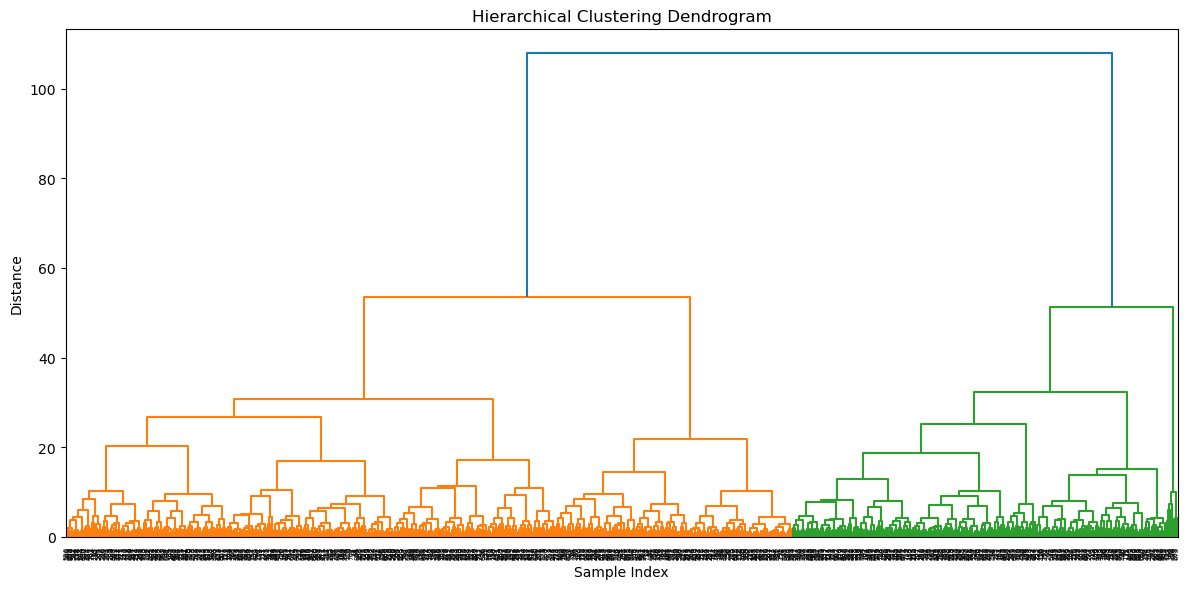


Cluster Sizes:
Cluster
4    358
2    274
3    173
1      8
Name: count, dtype: int64

Cluster vs True Label (Cross Tabulation):
class    bus  car  van
Cluster               
1          2    0    6
2         51  223    0
3         73   64   36
4         79  126  153


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# Load the dataset
df = pd.read_csv("vehicles.csv")

# Drop the 'class' column if it exists
if 'class' in df.columns:
    X = df.drop('class', axis=1)
else:
    X = df

# Drop missing values
X_clean = X.dropna()

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clean)

# Perform hierarchical clustering using Ward's method
linked = linkage(X_scaled, method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=False)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()

# Assign cluster labels (e.g., 4 clusters)
num_clusters = 4
cluster_labels = fcluster(linked, num_clusters, criterion='maxclust')

# Create a new DataFrame for the cleaned data
df_clean = df.loc[X_clean.index].copy()
df_clean['Cluster'] = cluster_labels

# Display the number of data points in each cluster
print("\nCluster Sizes:")
print(df_clean['Cluster'].value_counts())

# Optional: Compare clusters with original 'class' labels if available
if 'class' in df.columns:
    print("\nCluster vs True Label (Cross Tabulation):")
    print(pd.crosstab(df_clean['Cluster'], df_clean['class']))
